In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Buku DM/dataset/breast-cancer-wisconsin.xlsx")
df

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
df.drop('Id', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              699 non-null    int64
 1   Uniformity_Cell_Size         699 non-null    int64
 2   Uniformity_Cell_Shape        699 non-null    int64
 3   Marginal_Adhesion            699 non-null    int64
 4   Single_Epithelial_Cell_Size  699 non-null    int64
 5   Bare_Nuclei                  699 non-null    int64
 6   Bland_Chromatin              699 non-null    int64
 7   Normal_Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [ ]:
print(round(df.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       699.00   
mean                2.81                         3.22         3.58   
std                 2.86                         2.21         3.62   
min                 1.00                         1.00         1.00   
25%       

In [ ]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

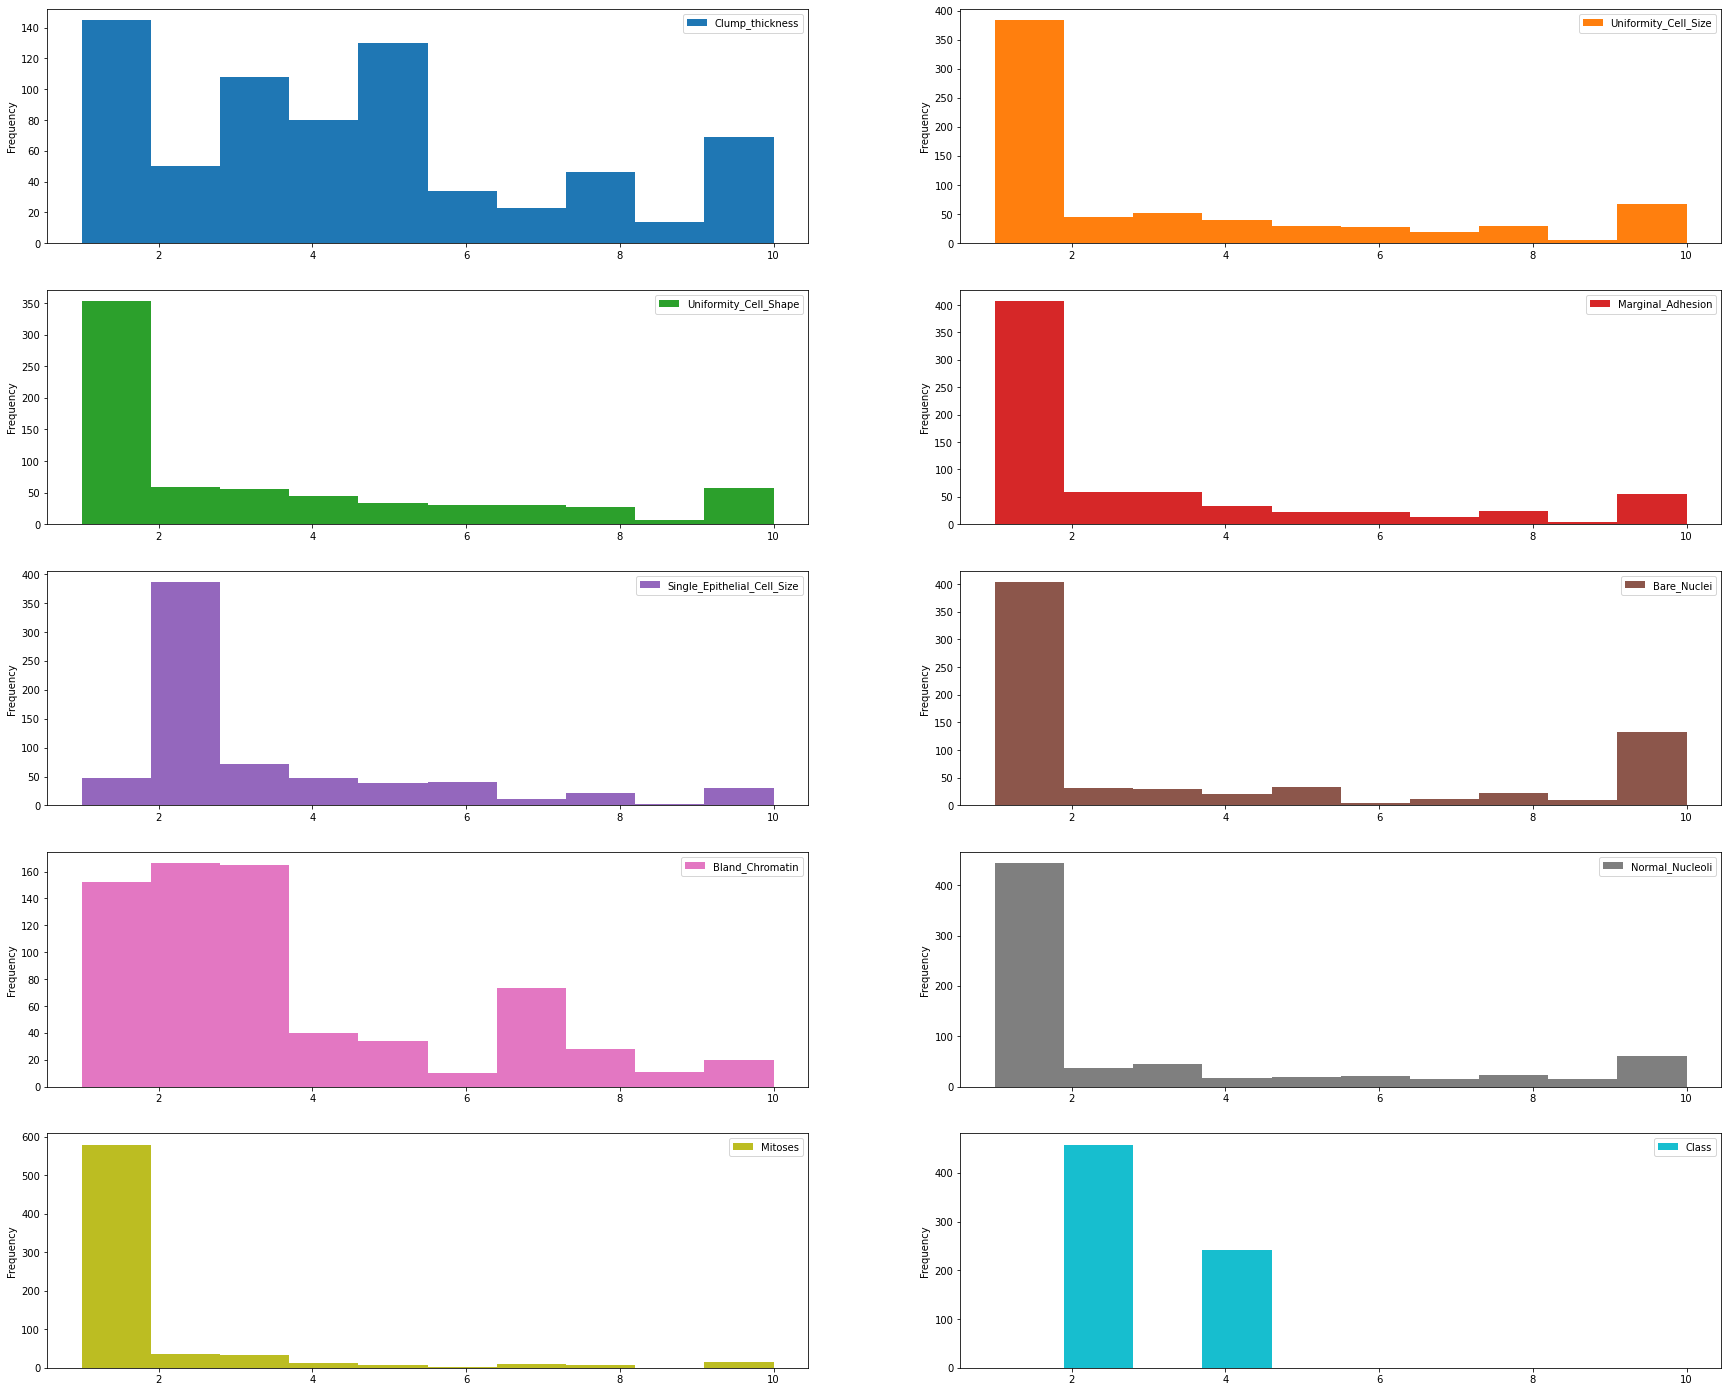

In [ ]:
plt.rcParams['figure.figsize']=(30,25)
df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()

In [ ]:
correlation = df.corr()
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bare_Nuclei                    0.806652
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

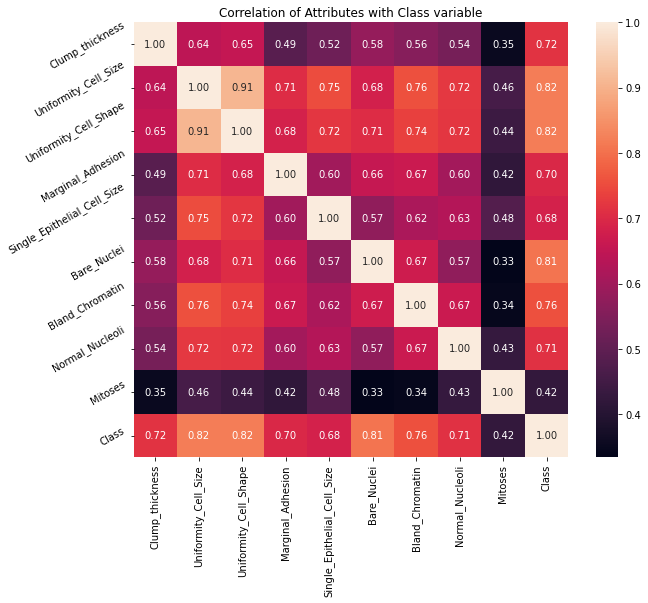

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.711168,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.774364,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.434998,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.117343,-0.179662,1.354454,-0.343912
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.711168,-0.179662,-0.611825,-0.343912
...,...,...,...,...,...,...,...,...,...
694,-0.503866,-0.699995,-0.743299,-0.633247,-0.097628,-0.434998,-1.000471,-0.611825,-0.343912
695,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,-0.711168,-1.000471,-0.611825,-0.343912
696,0.206936,2.251526,2.287222,0.067687,1.710106,-0.158828,1.872361,2.337594,0.239570
697,-0.148465,1.595632,0.940324,0.418154,-0.097628,0.117343,2.693171,1.026741,-0.343912


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((559, 9), (140, 9))

In [ ]:
X_train

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
293,1.983939,0.283845,0.266875,1.119088,-0.549561,1.774364,-0.590067,0.043601,-0.343912
62,1.628538,2.251526,2.287222,-0.633247,3.065906,1.222024,-0.179662,0.043601,-0.343912
485,-1.214667,-0.699995,-0.743299,0.067687,-1.001495,-0.158828,-1.000471,-0.611825,-0.343912
422,-0.148465,-0.044102,-0.069850,-0.633247,-0.549561,-0.711168,-0.179662,0.043601,-0.343912
332,0.206936,-0.372048,-0.406574,-0.282780,-0.549561,-0.711168,-0.590067,-0.284112,-0.343912
...,...,...,...,...,...,...,...,...,...
359,1.983939,-0.044102,0.603599,0.418154,-0.097628,0.945854,-0.179662,0.699028,0.823051
192,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.711168,-0.590067,-0.611825,-0.343912
629,-0.148465,-0.699995,-0.743299,-0.633247,-0.549561,-0.711168,-1.000471,-0.611825,-0.343912
559,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.711168,-0.590067,-0.611825,-0.343912


In [ ]:
X_test

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
476,-0.148465,-0.699995,-0.406574,-0.633247,-0.549561,-0.711168,-1.000471,-0.611825,-0.343912
531,-0.148465,-0.372048,-0.406574,-0.633247,-0.549561,-0.711168,-0.590067,-0.611825,-0.343912
40,0.562336,0.939739,0.940324,2.170488,1.258172,-0.158828,1.461957,1.682167,-0.343912
432,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.711168,-0.590067,-0.284112,-0.343912
14,1.273138,1.267685,0.603599,2.520955,1.710106,1.498194,0.641147,0.699028,1.406532
...,...,...,...,...,...,...,...,...,...
310,-0.859266,-0.699995,-0.743299,-0.633247,-0.097628,-0.711168,-0.590067,-0.611825,-0.343912
644,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,-0.711168,-1.000471,-0.611825,-0.343912
523,0.917737,0.611792,0.940324,2.520955,0.354305,1.774364,0.641147,0.043601,-0.343912
470,-0.503866,-0.699995,-0.743299,-0.633247,-1.001495,-0.711168,-0.590067,-0.611825,-0.343912


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier(n_neighbors=3,weights='distance',metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [ ]:
y_pred = knn.predict(X_test)

y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9714


In [ ]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [ ]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9714


In [ ]:
y_test.value_counts()

2    85
4    55
Name: Class, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Negatives(TP) = ', cm[0,0])
print('\nTrue Positives(TN) = ', cm[1,1])
print('\nFalse Negatives(FP) = ', cm[0,1])
print('\nFalse Positives(FN) = ', cm[1,0])

Confusion matrix

 [[83  2]
 [ 2 53]]

True Negatives(TP) =  83

True Positives(TN) =  53

False Negatives(FP) =  2

False Positives(FN) =  2


<AxesSubplot:>

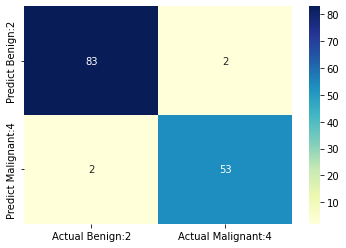

In [ ]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(cm, columns=['Actual Benign:2', 'Actual Malignant:4'], index=['Predict Benign:2', 'Predict Malignant:4'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        85
           4       0.96      0.96      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.88571429 0.94285714 0.97142857 0.91428571 1.         0.95714286
 0.97142857 1.         0.95714286 0.97101449]


In [ ]:
print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Average cross-validation score: 0.96
